In [2]:
pip install statannotations

  Using cached statannotations-0.5.0-py3-none-any.whl (31 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import pandas as pd
import qiime2 as q2
from qiime2 import Visualization
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy as np
import seaborn as sns
from statannotations.Annotator import Annotator
import scipy.stats as stats

%matplotlib inline

from scipy import stats

data_dir = 'Alien_data'

# this is to silence pandas' warnings
import warnings
warnings.simplefilter(action='ignore')

In [5]:
categorical_stool

,stool_consistency,faith_pd
N4VICF,formed,9.260301
8A0F9A,formed,9.013610
2I7SIQ,liquid,6.954535
PCUMU7,semi-formed,6.302976
XO59R8,liquid,9.382723
...,...,...
U5Y4NC,semi-formed,7.378341
HCMB0Y,formed,7.937900
P0A2X1,semi-formed,5.662648
F89RLS,semi-formed,5.320949


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

semi-formed vs. formed: Custom statistical test, P_val:3.341e-04
liquid vs. semi-formed: Custom statistical test, P_val:6.794e-01
liquid vs. formed: Custom statistical test, P_val:9.252e-04


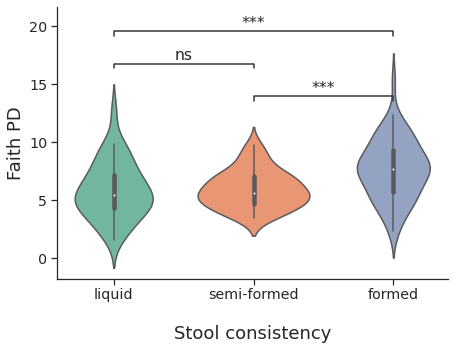

In [4]:
#stool consistency and faith pd
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/faith_pd_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['stool_consistency']
categorical_stool=pd.concat([md,div], axis=1, join='inner')

pairs = [('formed', 'liquid'),
         ('formed', 'semi-formed'),
         ('liquid', 'semi-formed')]

pvalues = [0.000925164, 0.000334088, 0.679393545]

parameters = {
    'data':    categorical_stool,
    'x':       'stool_consistency',
    'order':   ["liquid","semi-formed","formed"],
    'y':       'faith_pd',
    'palette': "Set2"
}

sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.violinplot(**parameters)
    
    ax.set_xlabel('Stool consistency', fontsize=18)
    ax.set_ylabel('Faith PD', fontsize=18)
    #ax.set_xticklabels(('Pre','Peri','Post'), fontsize=14)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.17)
    
    annotator = Annotator(ax, pairs, **parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

semi-formed vs. formed: Custom statistical test, P_val:1.967e-04
liquid vs. semi-formed: Custom statistical test, P_val:1.082e-01
liquid vs. formed: Custom statistical test, P_val:1.410e-05


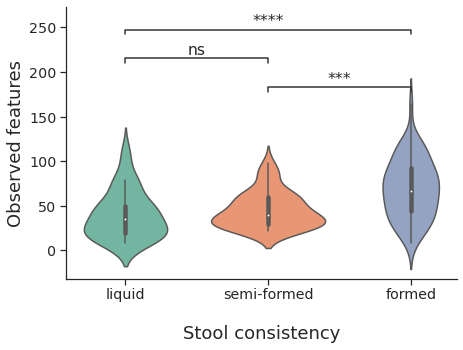

In [10]:
#stool consistency and Observed
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/observed_features_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['stool_consistency']
categorical_stool=pd.concat([md,div], axis=1, join='inner')

pairs = [('formed', 'liquid'),
         ('formed', 'semi-formed'),
         ('liquid', 'semi-formed')]

pvalues = [1.41E-05, 0.000196705, 0.10823592]

parameters = {
    'data':    categorical_stool,
    'x':       'stool_consistency',
    'order':   ["liquid","semi-formed","formed"],
    'y':       'observed_features',
    'palette': "Set2"
}

sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.violinplot(**parameters)
    
    ax.set_xlabel('Stool consistency', fontsize=18)
    ax.set_ylabel('Observed features', fontsize=18)
    #ax.set_xticklabels(('Pre','Peri','Post'), fontsize=14)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.17)
    
    annotator = Annotator(ax, pairs, **parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

semi-formed vs. formed: Custom statistical test, P_val:2.760e-05
liquid vs. semi-formed: Custom statistical test, P_val:1.244e-01
liquid vs. formed: Custom statistical test, P_val:1.030e-08


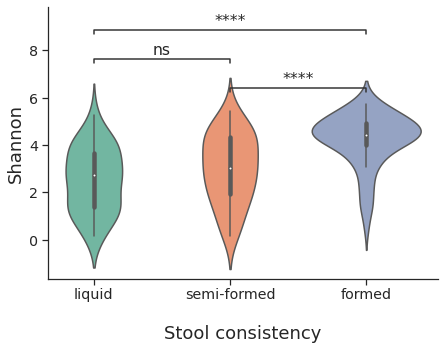

In [11]:
#stool consistency and Shannon entropy
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/shannon_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['stool_consistency']
categorical_stool=pd.concat([md,div], axis=1, join='inner')

pairs = [('formed', 'liquid'),
         ('formed', 'semi-formed'),
         ('liquid', 'semi-formed')]

pvalues = [1.03E-08, 2.76E-05, 0.124392732]

parameters = {
    'data':    categorical_stool,
    'x':       'stool_consistency',
    'order':   ["liquid","semi-formed","formed"],
    'y':       'shannon_entropy',
    'palette': "Set2"
}

sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.violinplot(**parameters)
    
    ax.set_xlabel('Stool consistency', fontsize=18)
    ax.set_ylabel('Shannon', fontsize=18)
    #ax.set_xticklabels(('Pre','Peri','Post'), fontsize=14)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.17)
    
    annotator = Annotator(ax, pairs, **parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

semi-formed vs. formed: Custom statistical test, P_val:1.292e-04
liquid vs. semi-formed: Custom statistical test, P_val:2.035e-01
liquid vs. formed: Custom statistical test, P_val:1.850e-07


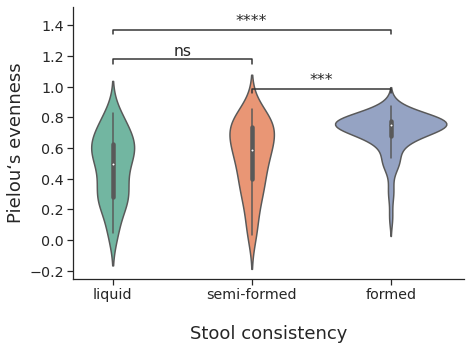

In [12]:
#stool consistency and Evenness
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/evenness_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['stool_consistency']
categorical_stool=pd.concat([md,div], axis=1, join='inner')

pairs = [('formed', 'liquid'),
         ('formed', 'semi-formed'),
         ('liquid', 'semi-formed')]

pvalues = [1.85E-07, 0.000129221, 0.20349249]

parameters = {
    'data':    categorical_stool,
    'x':       'stool_consistency',
    'order':   ["liquid","semi-formed","formed"],
    'y':       'pielou_evenness',
    'palette': "Set2"
}

sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.violinplot(**parameters)
    
    ax.set_xlabel('Stool consistency', fontsize=18)
    ax.set_ylabel('Pielou‘s evenness', fontsize=18)
    #ax.set_xticklabels(('Pre','Peri','Post'), fontsize=14)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.17)
    
    annotator = Annotator(ax, pairs, **parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. peri: Custom statistical test, P_val:3.089e-03
peri vs. post: Custom statistical test, P_val:6.584e-01
pre vs. post: Custom statistical test, P_val:7.247e-03


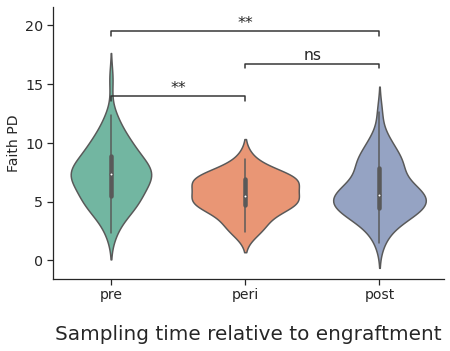

In [19]:
#categorical time relative to hct to faith pd
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/faith_pd_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['categorical_time_relative_to_engraftment']
categorical_time=pd.concat([md,div], axis=1, join='inner')

pairs = [('pre', 'peri'),
         ('peri', 'post'),
         ('pre', 'post')]

pvalues = [0.00308931, 0.658378288, 0.007247166]

parameters = {
    'data':    categorical_time,
    'x':       'categorical_time_relative_to_engraftment',
    'y':       'faith_pd',
    'palette': "Set2"
}

sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.violinplot(**parameters)
    
    ax.set_xlabel('Sampling time relative to engraftment', fontsize=20)
    ax.set_ylabel('Faith PD', fontsize=14)
    #ax.set_xticklabels(('pre','peri','post'), fontsize=14)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.17)
    
    annotator = Annotator(ax, pairs, **parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. peri: Custom statistical test, P_val:8.060e-05
peri vs. post: Custom statistical test, P_val:7.196e-01
pre vs. post: Custom statistical test, P_val:5.750e-06


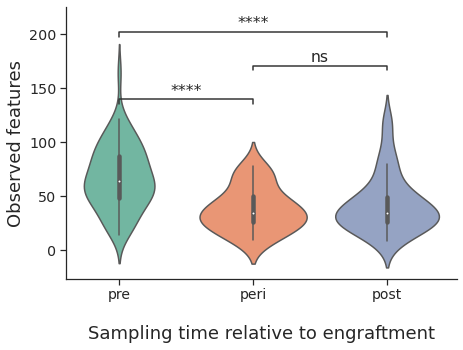

In [14]:
#categorical time relative to hct to observed features
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/observed_features_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['categorical_time_relative_to_engraftment']
categorical_time=pd.concat([md,div], axis=1, join='inner')

pairs = [('pre', 'peri'),
         ('peri', 'post'),
         ('pre', 'post')]

pvalues = [8.06E-05, 0.719550534, 5.75E-06]

parameters = {
    'data':    categorical_time,
    'x':       'categorical_time_relative_to_engraftment',
    'y':       'observed_features',
    'palette': "Set2"
}

sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.violinplot(**parameters)
    
    ax.set_xlabel('Sampling time relative to engraftment', fontsize=18)
    ax.set_ylabel('Observed features', fontsize=18)
    #ax.set_xticklabels(('pre','peri','post'), fontsize=14)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.17)
    
    annotator = Annotator(ax, pairs, **parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. peri: Custom statistical test, P_val:5.870e-06
peri vs. post: Custom statistical test, P_val:4.222e-02
pre vs. post: Custom statistical test, P_val:8.810e-11


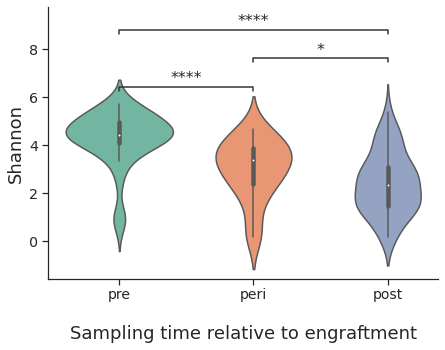

In [16]:
#categorical time relative to hct to shannon
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/shannon_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['categorical_time_relative_to_engraftment']
categorical_time=pd.concat([md,div], axis=1, join='inner')

pairs = [('pre', 'peri'),
         ('peri', 'post'),
         ('pre', 'post')]

pvalues = [5.87E-06, 0.042220323, 8.81E-11]

parameters = {
    'data':    categorical_time,
    'x':       'categorical_time_relative_to_engraftment',
    'y':       'shannon_entropy',
    'palette': "Set2"
}

sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.violinplot(**parameters)
    
    ax.set_xlabel('Sampling time relative to engraftment', fontsize=18)
    ax.set_ylabel('Shannon', fontsize=18)
    #ax.set_xticklabels(('pre','peri','post'), fontsize=14)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.17)
    
    annotator = Annotator(ax, pairs, **parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. peri: Custom statistical test, P_val:8.280e-05
peri vs. post: Custom statistical test, P_val:8.133e-03
pre vs. post: Custom statistical test, P_val:1.880e-11


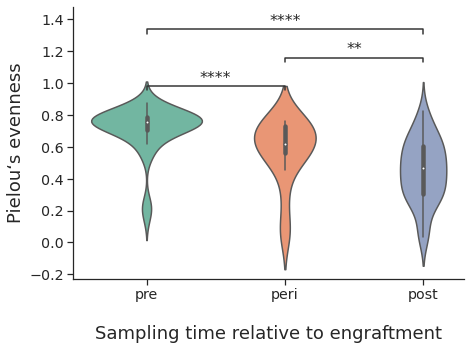

In [17]:
#categorical time relative to hct to Evenness
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/evenness_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['categorical_time_relative_to_engraftment']
categorical_time=pd.concat([md,div], axis=1, join='inner')

pairs = [('pre', 'peri'),
         ('peri', 'post'),
         ('pre', 'post')]

pvalues = [8.28E-05, 0.008132669, 1.88E-11]

parameters = {
    'data':    categorical_time,
    'x':       'categorical_time_relative_to_engraftment',
    'y':       'pielou_evenness',
    'palette': "Set2"
}

sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.violinplot(**parameters)
    
    ax.set_xlabel('Sampling time relative to engraftment', fontsize=18)
    ax.set_ylabel('Pielou‘s evenness', fontsize=18)
    #ax.set_xticklabels(('pre','peri','post'), fontsize=14)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.17)
    
    annotator = Annotator(ax, pairs, **parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

non_abducted vs. abducted: Custom statistical test, P_val:2.932e-03


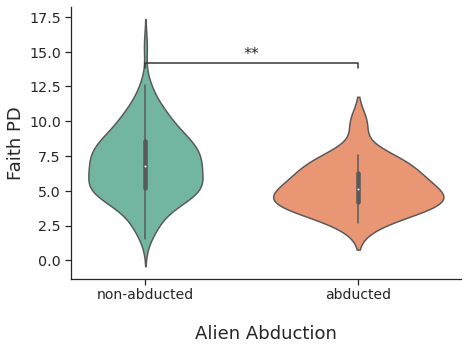

In [18]:
#abduction to faith pd
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/faith_pd_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['alleged_abduction']
categorical_abduction=pd.concat([md,div], axis=1, join='inner')

pairs = [('abducted', 'non_abducted')]

pvalues = [0.002931966]

parameters = {
    'data':    categorical_abduction,
    'x':       'alleged_abduction',
    'y':       'faith_pd',
    'palette': "Set2"
}

sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.violinplot(**parameters)
    
    ax.set_xlabel('Alien Abduction', fontsize=18)
    ax.set_ylabel('Faith PD', fontsize=18)
    ax.set_xticklabels(('non-abducted','abducted'), fontsize=14)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.17)
    
    annotator = Annotator(ax, pairs, **parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

non_abducted vs. abducted: Custom statistical test, P_val:1.125e-04


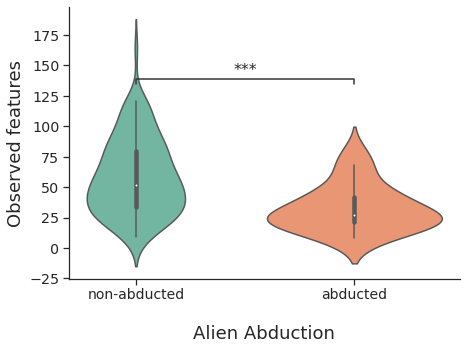

In [19]:
#abduction to observed features
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/observed_features_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['alleged_abduction']
categorical_abduction=pd.concat([md,div], axis=1, join='inner')

pairs = [('abducted', 'non_abducted')]

pvalues = [0.000112507]

parameters = {
    'data':    categorical_abduction,
    'x':       'alleged_abduction',
    'y':       'observed_features',
    'palette': "Set2"
}

sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.violinplot(**parameters)
    
    ax.set_xlabel('Alien Abduction', fontsize=18)
    ax.set_ylabel('Observed features', fontsize=18)
    ax.set_xticklabels(('non-abducted','abducted'), fontsize=14)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.17)
    
    annotator = Annotator(ax, pairs, **parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

non_abducted vs. abducted: Custom statistical test, P_val:1.060e-06


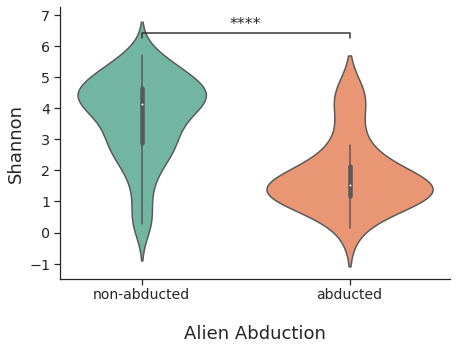

In [20]:
#abduction to shannon
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/shannon_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['alleged_abduction']
categorical_abduction=pd.concat([md,div], axis=1, join='inner')

pairs = [('abducted', 'non_abducted')]

pvalues = [1.06E-06]

parameters = {
    'data':    categorical_abduction,
    'x':       'alleged_abduction',
    'y':       'shannon_entropy',
    'palette': "Set2"
}

sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.violinplot(**parameters)
    
    ax.set_xlabel('Alien Abduction', fontsize=18)
    ax.set_ylabel('Shannon', fontsize=18)
    ax.set_xticklabels(('non-abducted','abducted'), fontsize=14)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.17)
    
    annotator = Annotator(ax, pairs, **parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

non_abducted vs. abducted: Custom statistical test, P_val:7.740e-07


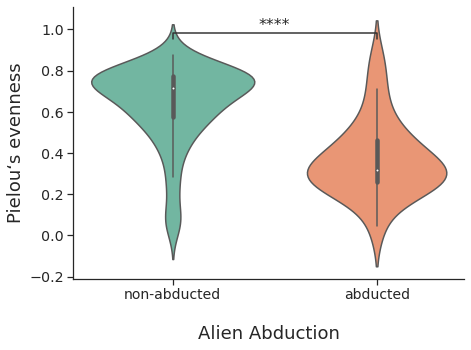

In [21]:
#abduction to evenness
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/evenness_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['alleged_abduction']
categorical_abduction=pd.concat([md,div], axis=1, join='inner')

pairs = [('abducted', 'non_abducted')]

pvalues = [7.74E-07]

parameters = {
    'data':    categorical_abduction,
    'x':       'alleged_abduction',
    'y':       'pielou_evenness',
    'palette': "Set2"
}

sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.violinplot(**parameters)
    
    ax.set_xlabel('Alien Abduction', fontsize=18)
    ax.set_ylabel('Pielou‘s evenness', fontsize=18)
    ax.set_xticklabels(('non-abducted','abducted'), fontsize=14)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.17)
    
    annotator = Annotator(ax, pairs, **parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HCT week vs. one week after HCT: Custom statistical test, P_val:3.641e-01
one week before HCT vs. HCT week: Custom statistical test, P_val:4.457e-03
two weeks before HCT vs. one week before HCT: Custom statistical test, P_val:4.880e-01
two weeks before HCT vs. HCT week: Custom statistical test, P_val:2.415e-02
one week before HCT vs. one week after HCT: Custom statistical test, P_val:9.263e-03
two weeks before HCT vs. one week after HCT: Custom statistical test, P_val:3.235e-02


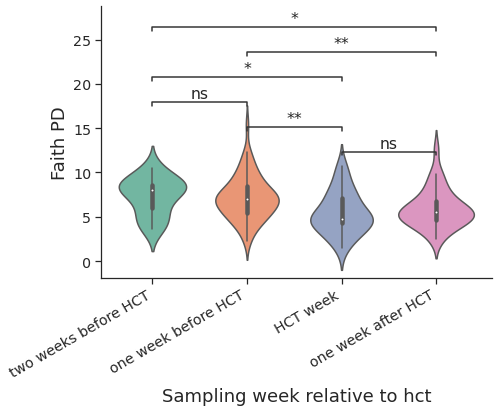

In [27]:
#categorical time relative to hct to faith pd
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/faith_pd_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['week_relative_to_hct']
categorical_week=pd.concat([md,div], axis=1, join='inner')

pairs = [('HCT week', 'one week after HCT'),
        ('HCT week','one week before HCT'),
        ('HCT week','two weeks before HCT'),
        ('one week after HCT','one week before HCT'),
         ('one week after HCT','two weeks before HCT'),
         ('one week before HCT','two weeks before HCT')]

pvalues = [0.364051684,0.004457321,0.024147398,0.009262517,0.03234558,0.488017261]

parameters = {
    'data':    categorical_week,
    'x':       'week_relative_to_hct',
    'order': ["two weeks before HCT", "one week before HCT", "HCT week", "one week after HCT"],
    'y':       'faith_pd',
    'palette': "Set2"
}

sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.violinplot(**parameters)
    
    ax.set_xlabel('Sampling week relative to HCT', fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_ylabel('Faith PD', fontsize=18)
    #ax.set_xticklabels(('non-abducted','abducted'), fontsize=14)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.4)
    
    annotator = Annotator(ax, pairs, **parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HCT week vs. one week after HCT: Custom statistical test, P_val:2.714e-01
one week before HCT vs. HCT week: Custom statistical test, P_val:3.190e-05
two weeks before HCT vs. one week before HCT: Custom statistical test, P_val:6.634e-01
two weeks before HCT vs. HCT week: Custom statistical test, P_val:1.555e-03
one week before HCT vs. one week after HCT: Custom statistical test, P_val:2.500e-05
two weeks before HCT vs. one week after HCT: Custom statistical test, P_val:3.123e-03


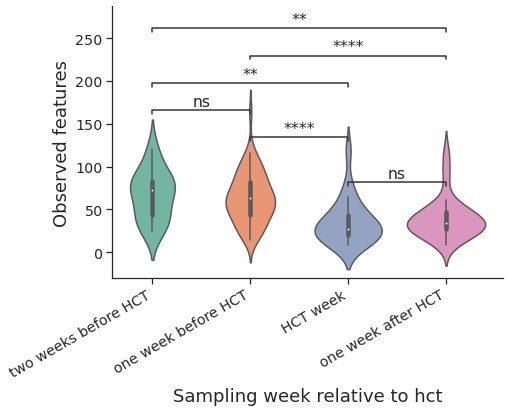

In [28]:
#categorical time relative to hct to observed features
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/observed_features_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['week_relative_to_hct']
categorical_week=pd.concat([md,div], axis=1, join='inner')

pairs = [('HCT week', 'one week after HCT'),
        ('HCT week','one week before HCT'),
        ('HCT week','two weeks before HCT'),
        ('one week after HCT','one week before HCT'),
         ('one week after HCT','two weeks before HCT'),
         ('one week before HCT','two weeks before HCT')]

pvalues = [0.27138632,3.19E-05,0.001554764,2.50E-05,0.003122657,0.663390728]

parameters = {
    'data':    categorical_week,
    'x':       'week_relative_to_hct',
    'order': ["two weeks before HCT", "one week before HCT", "HCT week", "one week after HCT"],
    'y':       'observed_features',
    'palette': "Set2"
}

sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.violinplot(**parameters)
    
    ax.set_xlabel('Sampling week relative to HCT', fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_ylabel('Observed features', fontsize=18)
    #ax.set_xticklabels(('non-abducted','abducted'), fontsize=14)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.4)
    
    annotator = Annotator(ax, pairs, **parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HCT week vs. one week after HCT: Custom statistical test, P_val:6.098e-02
one week before HCT vs. HCT week: Custom statistical test, P_val:1.800e-05
two weeks before HCT vs. one week before HCT: Custom statistical test, P_val:6.635e-01
two weeks before HCT vs. HCT week: Custom statistical test, P_val:1.119e-02
one week before HCT vs. one week after HCT: Custom statistical test, P_val:3.040e-09
two weeks before HCT vs. one week after HCT: Custom statistical test, P_val:3.114e-04


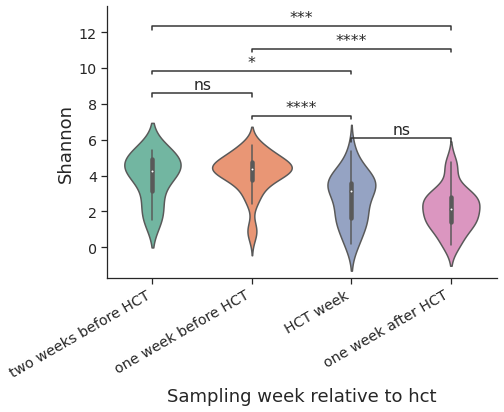

In [29]:
#categorical time relative to hct to shannon
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/shannon_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['week_relative_to_hct']
categorical_week=pd.concat([md,div], axis=1, join='inner')

pairs = [('HCT week', 'one week after HCT'),
        ('HCT week','one week before HCT'),
        ('HCT week','two weeks before HCT'),
        ('one week after HCT','one week before HCT'),
         ('one week after HCT','two weeks before HCT'),
         ('one week before HCT','two weeks before HCT')]

pvalues = [0.060980846,1.80E-05,0.011192745,3.04E-09,0.000311401,0.663478364]

parameters = {
    'data':    categorical_week,
    'x':       'week_relative_to_hct',
    'order': ["two weeks before HCT", "one week before HCT", "HCT week", "one week after HCT"],
    'y':       'shannon_entropy',
    'palette': "Set2"
}

sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.violinplot(**parameters)
    
    ax.set_xlabel('Sampling week relative to HCT', fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_ylabel('Shannon', fontsize=18)
    #ax.set_xticklabels(('non-abducted','abducted'), fontsize=14)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.4)
    
    annotator = Annotator(ax, pairs, **parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HCT week vs. one week after HCT: Custom statistical test, P_val:8.714e-03
one week before HCT vs. HCT week: Custom statistical test, P_val:3.487e-04
two weeks before HCT vs. one week before HCT: Custom statistical test, P_val:3.842e-01
two weeks before HCT vs. HCT week: Custom statistical test, P_val:7.948e-02
one week before HCT vs. one week after HCT: Custom statistical test, P_val:1.400e-09
two weeks before HCT vs. one week after HCT: Custom statistical test, P_val:3.721e-04


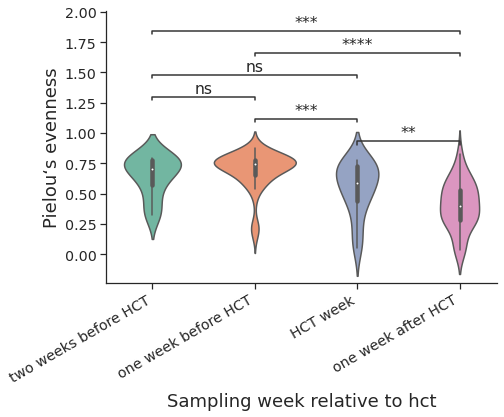

In [30]:
#categorical time relative to hct to pielou evenness
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/evenness_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['week_relative_to_hct']
categorical_week=pd.concat([md,div], axis=1, join='inner')

pairs = [('HCT week', 'one week after HCT'),
        ('HCT week','one week before HCT'),
        ('HCT week','two weeks before HCT'),
        ('one week after HCT','one week before HCT'),
         ('one week after HCT','two weeks before HCT'),
         ('one week before HCT','two weeks before HCT')]

pvalues = [0.008713676,0.000348734,0.079479424,1.40E-09,0.000372125,0.384173833]

parameters = {
    'data':    categorical_week,
    'x':       'week_relative_to_hct',
    'order': ["two weeks before HCT", "one week before HCT", "HCT week", "one week after HCT"],
    'y':       'pielou_evenness',
    'palette': "Set2"
}

sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.violinplot(**parameters)
    
    ax.set_xlabel('Sampling week relative to HCT', fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_ylabel('Pielou‘s evenness', fontsize=18)
    #ax.set_xticklabels(('non-abducted','abducted'), fontsize=14)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.4)
    
    annotator = Annotator(ax, pairs, **parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

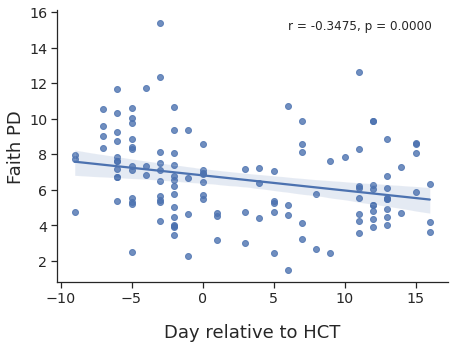

In [68]:
#day relative to hct to faith pd
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/faith_pd_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['day_relative_to_nearest_hct']
numeric_day=pd.concat([md,div], axis=1, join='inner')

parameters = {
    'data':    numeric_day,
    'x':       'day_relative_to_nearest_hct',
    'y':       'faith_pd'
}
sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.regplot(**parameters)
    
    ax.set_xlabel('Day relative to HCT', fontsize=18)
    ax.set_ylabel('Faith PD', fontsize=18)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.15)
    ax.text(6, 15,'r = -0.3475, p = 0.0000', fontsize=12)


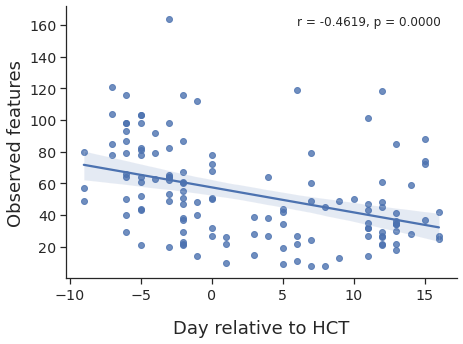

In [74]:
#day relative to hct to observed features
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/observed_features_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['day_relative_to_nearest_hct']
numeric_day=pd.concat([md,div], axis=1, join='inner')

parameters = {
    'data':    numeric_day,
    'x':       'day_relative_to_nearest_hct',
    'y':       'observed_features'
}
sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.regplot(**parameters)
    
    ax.set_xlabel('Day relative to HCT', fontsize=18)
    ax.set_ylabel('Observed features', fontsize=18)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.15)
    ax.text(6, 160,'r = -0.4619, p = 0.0000', fontsize=12)

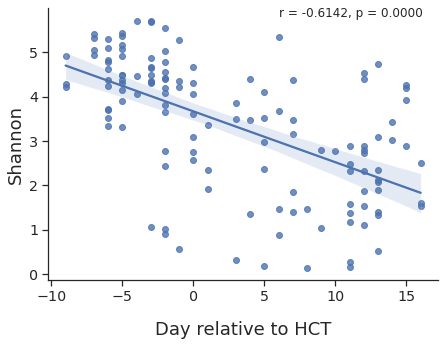

In [81]:
#day relative to hct to shannon
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/shannon_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['day_relative_to_nearest_hct']
numeric_day=pd.concat([md,div], axis=1, join='inner')

parameters = {
    'data':    numeric_day,
    'x':       'day_relative_to_nearest_hct',
    'y':       'shannon_entropy'
}
sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.regplot(**parameters)
    
    ax.set_xlabel('Day relative to HCT', fontsize=18)
    ax.set_ylabel('Shannon', fontsize=18)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.15)
    ax.text(6, 5.8,'r = -0.6142, p = 0.0000', fontsize=12)

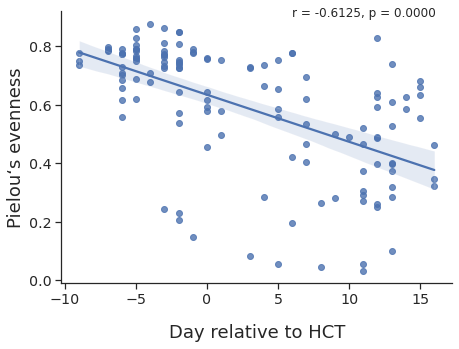

In [86]:
#day relative to hct to evenness
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/evenness_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['day_relative_to_nearest_hct']
numeric_day=pd.concat([md,div], axis=1, join='inner')

parameters = {
    'data':    numeric_day,
    'x':       'day_relative_to_nearest_hct',
    'y':       'pielou_evenness'
}
sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.regplot(**parameters)
    
    ax.set_xlabel('Day relative to HCT', fontsize=18)
    ax.set_ylabel('Pielou‘s evenness', fontsize=18)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.15)
    ax.text(6, 0.9,'r = -0.6125, p = 0.0000', fontsize=12)

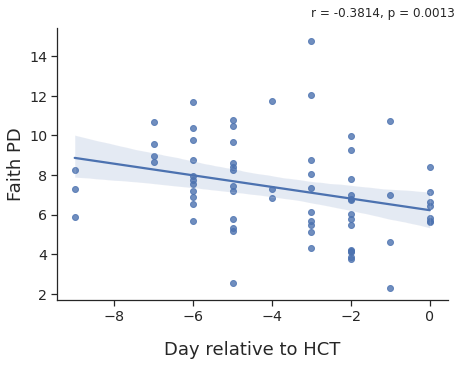

In [90]:
#day relative to hct (before hct) to faith pd
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results-before-hct/faith_pd_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['day_relative_to_nearest_hct']
numeric_day=pd.concat([md,div], axis=1, join='inner')

parameters = {
    'data':    numeric_day,
    'x':       'day_relative_to_nearest_hct',
    'y':       'faith_pd'
}
sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.regplot(**parameters)
    
    ax.set_xlabel('Day relative to HCT', fontsize=18)
    ax.set_ylabel('Faith PD', fontsize=18)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.15)
    ax.text(-3, 16,'r = -0.3814, p = 0.0013', fontsize=12)

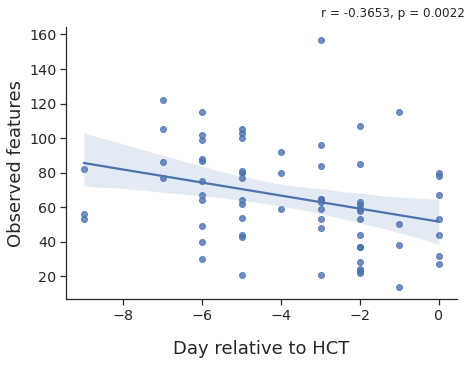

In [94]:
#day relative to hct (before hct) to observed
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results-before-hct/observed_features_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['day_relative_to_nearest_hct']
numeric_day=pd.concat([md,div], axis=1, join='inner')

parameters = {
    'data':    numeric_day,
    'x':       'day_relative_to_nearest_hct',
    'y':       'observed_features'
}
sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.regplot(**parameters)
    
    ax.set_xlabel('Day relative to HCT', fontsize=18)
    ax.set_ylabel('Observed features', fontsize=18)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.15)
    ax.text(-3, 170,'r = -0.3653, p = 0.0022', fontsize=12)

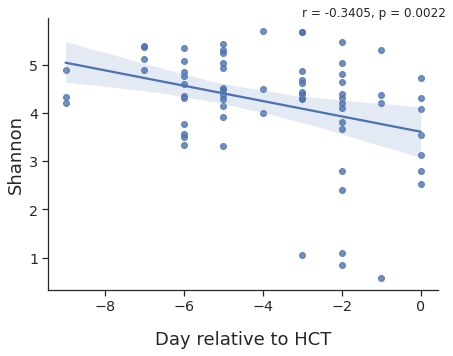

In [98]:
#day relative to hct (before hct) to shannon
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results-before-hct/shannon_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'str_metadata.tsv'), sep='\t', index_col=0)['day_relative_to_nearest_hct']
numeric_day=pd.concat([md,div], axis=1, join='inner')

parameters = {
    'data':    numeric_day,
    'x':       'day_relative_to_nearest_hct',
    'y':       'shannon_entropy'
}
sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.regplot(**parameters)
    
    ax.set_xlabel('Day relative to HCT', fontsize=18)
    ax.set_ylabel('Shannon', fontsize=18)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_coords(0.5, -0.15)
    ax.text(-3, 6,'r = -0.3405, p = 0.0022', fontsize=12)